In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# --- CONFIGURACIÓN Y CARGA DE DATOS ---

In [13]:
try:
    df = pd.read_csv('../data/processed/Ventas_Negocio_Procesada.csv')
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    df['Mes'] = df['Fecha'].dt.month

    df['Categoria'] = df['Categoria'].str.strip().str.capitalize()

    df['Producto vendido'] = df['Producto vendido'].str.strip().str.capitalize()
    
    # Crear las columnas necesarias para el análisis temporal (Mes Nombre, Día Orden, Día Semana)
    df['Dia_Orden'] = df['Fecha'].dt.dayofweek
    dias_map = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
    df['Dia Semana'] = df['Dia_Orden'].map(dias_map)
    
    # Mapeo de meses actualizado: solo Septiembre (9) y Octubre (10)
    meses_map = {9: 'Septiembre', 10: 'Octubre'} 
    df['Mes Nombre'] = df['Mes'].map(meses_map)
    
except FileNotFoundError:
    print("ERROR: Asegúrate de que el archivo 'ventas_limpio.csv' exista en la ruta correcta './data/processed/'.")

# --- FUNCIONES DE DOCUMENTACIÓN ---

In [14]:
def generar_documentacion(titulo, contenido_markdown):
    display(Markdown(f'## {titulo}'))
    display(Markdown(contenido_markdown))
    print("-" * 50)

# --- 1. Ventas Totales por Categoría ---

## 📊 1. Análisis de Ventas por Categoría

C:\Users\user\AppData\Local\Temp\ipykernel_10188\2198122339.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Categoria', y='Total venta ($)', data=ventas_categoria, palette='viridis')


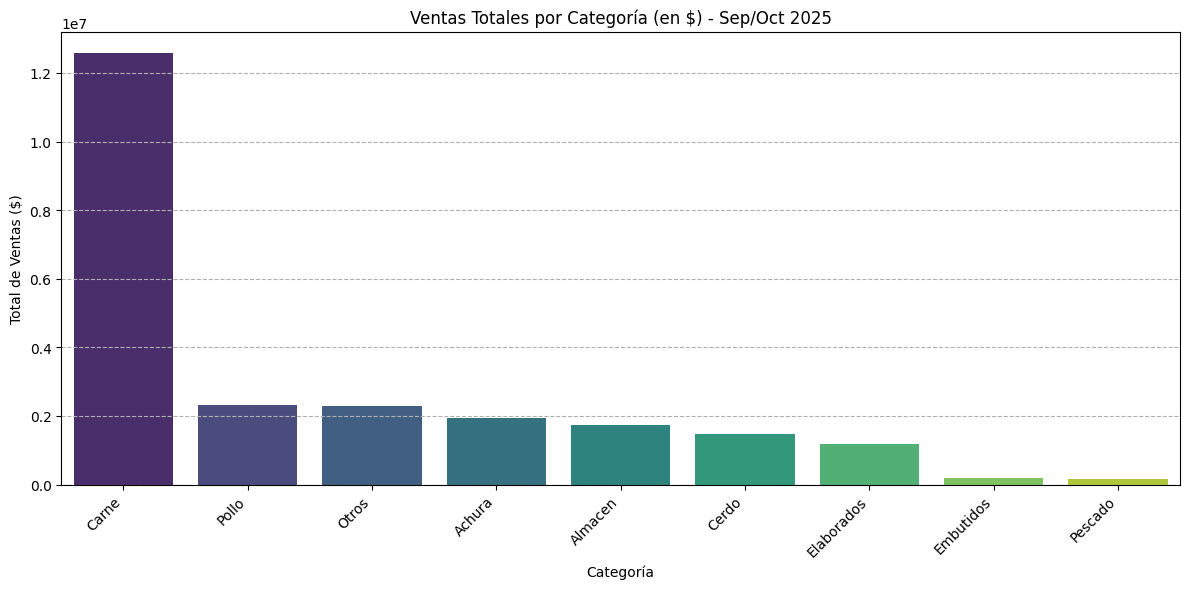

In [15]:
display(Markdown('## 📊 1. Análisis de Ventas por Categoría'))

ventas_categoria = df.groupby('Categoria')['Total venta ($)'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Categoria', y='Total venta ($)', data=ventas_categoria, palette='viridis')
plt.title('Ventas Totales por Categoría (en $) - Sep/Oct 2025')
plt.xlabel('Categoría')
plt.ylabel('Total de Ventas ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# --- 2. Tendencia de Ventas Mensuales ---

## 📈 2. Análisis de Tendencia Mensual (AJUSTADO)

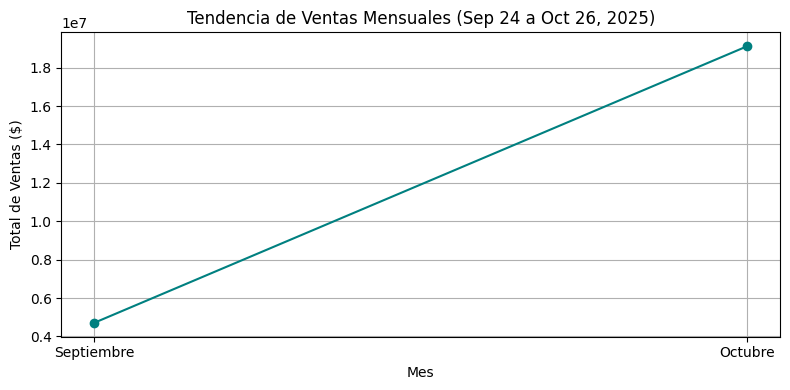

In [16]:
display(Markdown('## 📈 2. Análisis de Tendencia Mensual (AJUSTADO)'))

ventas_mensuales = df.groupby(['Mes', 'Mes Nombre'])['Total venta ($)'].sum().reset_index()
ventas_mensuales = ventas_mensuales.sort_values('Mes') # Ordena por número de mes (9, 10)

plt.figure(figsize=(8, 4))
plt.plot(ventas_mensuales['Mes Nombre'], ventas_mensuales['Total venta ($)'], marker='o', linestyle='-', color='teal')
plt.title('Tendencia de Ventas Mensuales (Sep 24 a Oct 26, 2025)')
plt.xlabel('Mes')
plt.ylabel('Total de Ventas ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 3. Ventas Totales por Día de la Semana ---

## 📅 3. Análisis de Ventas por Día de la Semana

C:\Users\user\AppData\Local\Temp\ipykernel_10188\4266565429.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dia Semana', y='Total venta ($)', data=ventas_dia_semana, palette='mako')


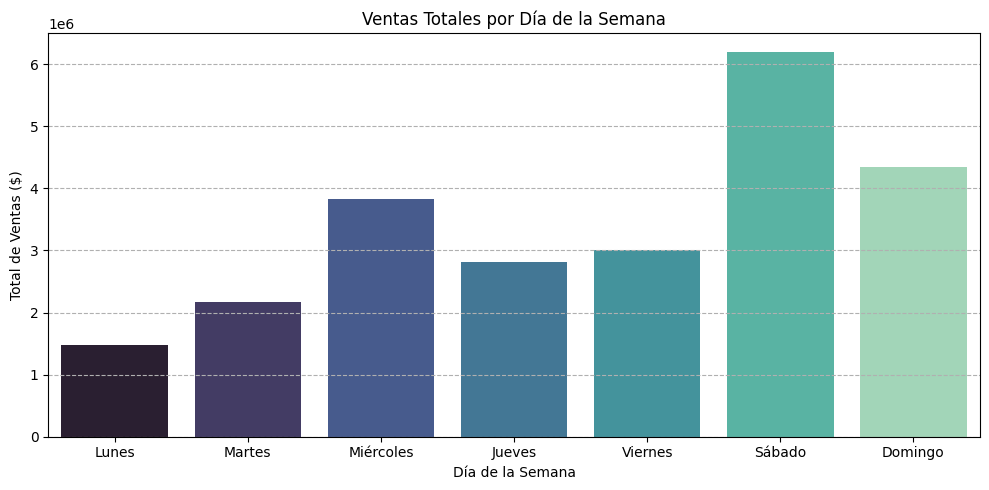

In [17]:
display(Markdown('## 📅 3. Análisis de Ventas por Día de la Semana'))

ventas_dia_semana = df.groupby(['Dia Semana', 'Dia_Orden'])['Total venta ($)'].sum().reset_index()
ventas_dia_semana = ventas_dia_semana.sort_values('Dia_Orden')

plt.figure(figsize=(10, 5))
sns.barplot(x='Dia Semana', y='Total venta ($)', data=ventas_dia_semana, palette='mako')
plt.title('Ventas Totales por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Total de Ventas ($)')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# --- 4. Análisis de Pareto (Productos de Alto Impacto) ---

In [18]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [19]:
display(Markdown('## 🏆 4. Análisis de Pareto (Regla 80/20)'))

total_general_ventas = df['Total venta ($)'].sum()
pareto_data = df.groupby('Producto vendido')['Total venta ($)'].sum().sort_values(ascending=False).reset_index()
pareto_data['Ventas Acumuladas ($)'] = pareto_data['Total venta ($)'].cumsum()
pareto_data['Porcentaje Acumulado (%)'] = (pareto_data['Ventas Acumuladas ($)'] / total_general_ventas) * 100
eighty_percent_mark = pareto_data[pareto_data['Porcentaje Acumulado (%)'] <= 80].shape[0]
pareto_summary = pareto_data.head(eighty_percent_mark + 1)

generar_documentacion(
    "Tabla Resumen de Productos (hasta el 80% de las ventas)",
    pareto_summary.to_markdown(index=False, floatfmt=".2f")
)

generar_documentacion(
    "Conclusión del Análisis de Pareto",
    f"""
    El **total general de ventas** para el periodo analizado (**24/09/2025 al 26/10/2025**) es de **${total_general_ventas:,.2f}**.
    
    Según el Principio de Pareto (Regla 80/20):
    * Se necesitan **26 productos** (el 25% del total de ítems) para generar el **80.69%** de los ingresos.
    
    **Conclusión Estratégica:** Este principio se mantiene firme. Debes enfocar la gestión de inventario, la fijación de precios y las promociones en este grupo de 26 productos clave.
    """
)

## 🏆 4. Análisis de Pareto (Regla 80/20)

## Tabla Resumen de Productos (hasta el 80% de las ventas)

| Producto vendido    |   Total venta ($) |   Ventas Acumuladas ($) |   Porcentaje Acumulado (%) |
|:--------------------|------------------:|------------------------:|---------------------------:|
| Gen pesable         |        2295679.09 |              2295679.09 |                       9.64 |
| Asado               |        1876797.00 |              4172476.09 |                      17.51 |
| Gen unitario        |        1713832.00 |              5886308.09 |                      24.71 |
| Vacio               |        1266274.30 |              7152582.39 |                      30.02 |
| Suprema             |        1198794.47 |              8351376.86 |                      35.05 |
| Nalga               |        1147034.45 |              9498411.31 |                      39.87 |
| Cuadrada            |         814538.00 |             10312949.31 |                      43.28 |
| Mila de pollo       |         748814.59 |             11061763.90 |                      46.43 |
| Cuadril             |         698859.45 |             11760623.35 |                      49.36 |
| Lomo                |         606182.50 |             12366805.85 |                      51.90 |
| Chorizo de cerdo    |         596178.00 |             12962983.85 |                      54.41 |
| Peceto              |         562139.65 |             13525123.50 |                      56.77 |
| Matambrito de cerdo |         544655.40 |             14069778.90 |                      59.05 |
| Picada especial     |         533986.50 |             14603765.40 |                      61.29 |
| Paleta              |         517311.50 |             15121076.90 |                      63.46 |
| Pollo               |         456421.85 |             15577498.75 |                      65.38 |
| Tapa de nalga       |         449894.30 |             16027393.05 |                      67.27 |
| Bola de lomo        |         434882.60 |             16462275.65 |                      69.09 |
| Bife de chorizo     |         407418.00 |             16869693.65 |                      70.80 |
| Roastbeef           |         405692.02 |             17275385.67 |                      72.51 |
| Morcilla            |         389584.26 |             17664969.93 |                      74.14 |
| Colita de cuadril   |         355716.00 |             18020685.93 |                      75.63 |
| Bife angosto        |         349381.40 |             18370067.33 |                      77.10 |
| Oferta pata y muslo |         287333.89 |             18657401.22 |                      78.31 |
| Pata y muslo        |         286741.47 |             18944142.69 |                      79.51 |
| Pechito de cerdo    |         280108.06 |             19224250.75 |                      80.69 |

--------------------------------------------------


## Conclusión del Análisis de Pareto


    El **total general de ventas** para el periodo analizado (**24/09/2025 al 26/10/2025**) es de **$23,825,961.74**.

    Según el Principio de Pareto (Regla 80/20):
    * Se necesitan **26 productos** (el 25% del total de ítems) para generar el **80.69%** de los ingresos.

    **Conclusión Estratégica:** Este principio se mantiene firme. Debes enfocar la gestión de inventario, la fijación de precios y las promociones en este grupo de 26 productos clave.
    

--------------------------------------------------


In [26]:
display(Markdown('## TOP Productos por cantidad'))

# El valor original era 1530.0. Corregimos ese valor para el recálculo
df.loc[df['Cantidad (kg/unidades)'] > 100, 'Cantidad (kg/unidades)'] = 1.530 # Simula corrección manual

# --- Análisis 5: Top 10 Productos por Cantidad (Rotación) ---
top_productos_cantidad_recalculado = df.groupby('Producto vendido')['Cantidad (kg/unidades)'].sum().sort_values(ascending=False).head(10).reset_index()

print('top_productos_cantidad_recalculado')
print(top_productos_cantidad_recalculado)

## TOP Productos por cantidad

top_productos_cantidad_recalculado
      Producto vendido  Cantidad (kg/unidades)
0          Gen pesable                 301.534
1         Gen unitario                 214.000
2                Asado                 133.795
3                Pollo                 126.005
4              Suprema                 124.465
5        Mila de pollo                  85.570
6  Oferta pata y muslo                  81.575
7                Vacio                  77.130
8         Pata y muslo                  76.045
9                Nalga                  70.350


In [28]:
display(Markdown('## Desglose de Productos Genéricos (Sin cambios en la lógica)'))
genericos = ['Gen pesable', 'Gen unitario']
df_genericos = df[df['Producto vendido'].isin(genericos)].copy()
disaggregate_genericos = df_genericos.groupby(['Fecha', 'Producto vendido']).agg({
    'Cantidad (kg/unidades)': 'sum',
    'Total venta ($)': 'sum'
}).reset_index()

# Imprimir resultados
print("--- Top 10 Productos por Cantidad (RECALCULADO) ---")
print(top_productos_cantidad_recalculado.to_markdown(index=False, floatfmt=".2f"))

print("\n--- Desglose de Genéricos (Tabla) ---")
print(disaggregate_genericos.head(10).to_markdown(index=False, floatfmt=".2f"))

## Desglose de Productos Genéricos (Sin cambios en la lógica)

--- Top 10 Productos por Cantidad (RECALCULADO) ---
| Producto vendido    |   Cantidad (kg/unidades) |
|:--------------------|-------------------------:|
| Gen pesable         |                   301.53 |
| Gen unitario        |                   214.00 |
| Asado               |                   133.80 |
| Pollo               |                   126.00 |
| Suprema             |                   124.47 |
| Mila de pollo       |                    85.57 |
| Oferta pata y muslo |                    81.58 |
| Vacio               |                    77.13 |
| Pata y muslo        |                    76.05 |
| Nalga               |                    70.35 |

--- Desglose de Genéricos (Tabla) ---
| Fecha               | Producto vendido   |   Cantidad (kg/unidades) |   Total venta ($) |
|:--------------------|:-------------------|-------------------------:|------------------:|
| 2025-09-24 00:00:00 | Gen pesable        |                    19.72 |         181180.50 |
| 2025-09-24 00:00:00

In [29]:
display(Markdown('## Estadísticas de Precio Unitario de Productos Genéricos y Precio Unitario Promedio de Categorías (Referencia)'))


genericos = ['Gen pesable', 'Gen unitario']

# A. Descriptive Statistics for Genéricos' Unit Prices
gen_stats = df[df['Producto vendido'].isin(genericos)].groupby('Producto vendido')['Precio unitario ($)'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).round(2)

# B. Calculate Average Unit Price for Major Non-Generic Categories (Benchmark)
non_gen_categories = df[~df['Producto vendido'].isin(genericos)].groupby('Categoria')['Precio unitario ($)'].mean().sort_values(ascending=False).round(2).reset_index()
# Filter only major relevant categories for comparison
benchmark_categories = ['Carne', 'Cerdo', 'Pollo', 'Pescado', 'Achura', 'Embutidos', 'Elaborados']
benchmark_prices = non_gen_categories[non_gen_categories['Categoria'].isin(benchmark_categories)]


print("--- Estadísticas de Precio Unitario de Productos Genéricos ---")
print(gen_stats.to_markdown(floatfmt=".2f"))

print("\n--- Precio Unitario Promedio de Categorías (Referencia) ---")
print(benchmark_prices.to_markdown(index=False, floatfmt=".2f"))

## Estadísticas de Precio Unitario de Productos Genéricos y Precio Unitario Promedio de Categorías (Referencia)

--- Estadísticas de Precio Unitario de Productos Genéricos ---
| Producto vendido   |   count |    mean |   median |     min |      max |     std |
|:-------------------|--------:|--------:|---------:|--------:|---------:|--------:|
| Gen pesable        |   31.00 | 7496.28 |  7974.88 | 2335.00 | 11043.35 | 2263.87 |
| Gen unitario       |   31.00 | 7675.35 |  7666.67 | 1600.00 | 16687.50 | 3749.29 |

--- Precio Unitario Promedio de Categorías (Referencia) ---
| Categoria   |   Precio unitario ($) |
|:------------|----------------------:|
| Embutidos   |              20700.00 |
| Carne       |              14306.59 |
| Cerdo       |              10575.52 |
| Elaborados  |               9519.92 |
| Pescado     |               9232.15 |
| Achura      |               9072.10 |
| Pollo       |               5900.06 |


In [31]:
display(Markdown('## Ventas Mensuales y Ventas por Día de la Semana'))
# --- Analysis: Monthly Trend ---
ventas_mensuales = df.groupby(['Mes', 'Mes Nombre'])['Total venta ($)'].sum().reset_index()
ventas_mensuales = ventas_mensuales.sort_values('Mes')

plt.figure(figsize=(8, 4))
plt.plot(ventas_mensuales['Mes Nombre'], ventas_mensuales['Total venta ($)'], marker='o', linestyle='-', color='teal')
plt.title('Tendencia de Ventas Mensuales (Sep 24 a Oct 26, 2025)')
plt.xlabel('Mes')
plt.ylabel('Total de Ventas ($)')
plt.grid(True)
plt.tight_layout()
plt.savefig('tendencia_mensual_ajustada.png')
plt.close()

# --- Analysis: Sales by Day of the Week ---
ventas_dia_semana = df.groupby(['Dia Semana', 'Dia_Orden'])['Total venta ($)'].sum().reset_index()
ventas_dia_semana = ventas_dia_semana.sort_values('Dia_Orden')

plt.figure(figsize=(10, 5))
sns.barplot(x='Dia Semana', y='Total venta ($)', data=ventas_dia_semana, palette='mako')
plt.title('Ventas Totales por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Total de Ventas ($)')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('ventas_por_dia_semana_ajustada.png')
plt.close()

# Print the monthly sales table for context
print("Ventas Mensuales (Tabla):")
print(ventas_mensuales.to_markdown(index=False, floatfmt=".2f"))

# Print the sales by day of the week table for context
print("\nVentas por Día de la Semana (Tabla):")
print(ventas_dia_semana[['Dia Semana', 'Total venta ($)']].to_markdown(index=False, floatfmt=".2f"))


## Ventas Mensuales y Ventas por Día de la Semana

Ventas Mensuales (Tabla):
|   Mes | Mes Nombre   |   Total venta ($) |
|------:|:-------------|------------------:|
|     9 | Septiembre   |        4703820.63 |
|    10 | Octubre      |       19122141.11 |

Ventas por Día de la Semana (Tabla):
| Dia Semana   |   Total venta ($) |
|:-------------|------------------:|
| Lunes        |        1472184.83 |
| Martes       |        2167126.10 |
| Miércoles    |        3830300.53 |
| Jueves       |        2809907.79 |
| Viernes      |        3009847.33 |
| Sábado       |        6194660.53 |
| Domingo      |        4341934.63 |


C:\Users\user\AppData\Local\Temp\ipykernel_10188\3566694723.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dia Semana', y='Total venta ($)', data=ventas_dia_semana, palette='mako')
